<a href="https://colab.research.google.com/github/kesshar/Portfolio_Optimization/blob/main/Week_2_Custom_Trading_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import random


In [2]:
from gymnasium import Env, spaces

class SimpleTradingEnv(Env):
    def __init__(self, prices):
        self.prices = prices
        self.action_space = spaces.Discrete(3)  # 0: Hold, 1: Buy, 2: Sell
        self.observation_space = spaces.Discrete(len(prices) * 2)
        self.reset()

    def reset(self, seed=None, options=None):
        self.current_step = 0
        self.holding = 0
        self.buy_price = 0
        return self._get_obs(), {}

    def _get_obs(self):
        return self.current_step * 2 + self.holding

    def step(self, action):
        reward = 0
        price = self.prices[self.current_step]
        if action == 1 and self.holding == 0:
            self.buy_price = price
            self.holding = 1
        elif action == 2 and self.holding == 1:
            reward = price - self.buy_price
            self.holding = 0

        self.current_step += 1
        done = self.current_step >= len(self.prices) - 1
        return self._get_obs(), reward, done, False, {}


In [3]:
prices = np.cumsum(np.random.randn(100)) + 100
env = SimpleTradingEnv(prices)

Q = np.zeros((env.observation_space.n, env.action_space.n))
alpha, gamma, epsilon = 0.1, 0.9, 0.1

for _ in range(1000):
    state, _ = env.reset()
    done = False
    while not done:
        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, done, _, _ = env.step(action)
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        state = next_state


Total Reward: 12.03355755595922


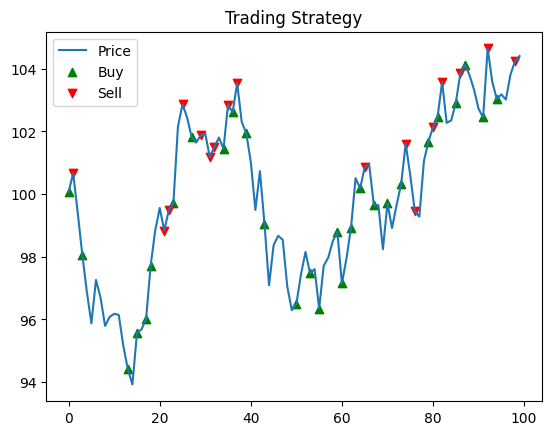

In [4]:
state, _ = env.reset()
done = False
total_reward = 0
actions = []

while not done:
    action = np.argmax(Q[state])
    actions.append(action)
    state, reward, done, _, _ = env.step(action)
    total_reward += reward

print("Total Reward:", total_reward)

plt.plot(prices, label="Price")
buys = [i for i, a in enumerate(actions) if a == 1]
sells = [i for i, a in enumerate(actions) if a == 2]
plt.scatter(buys, prices[buys], marker="^", c="g", label="Buy")
plt.scatter(sells, prices[sells], marker="v", c="r", label="Sell")
plt.legend(); plt.title("Trading Strategy"); plt.show()
